# Chapter 3 - Handling Missing Data

### 3.3. Handling Missing Numerical Data

#### 3.3.1. Mean and Median Imputation

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic_data  = titanic_data[["survived", "pclass", "age", "fare"]]
titanic_data.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [6]:
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [7]:
median = titanic_data.age.median()
print(median)

mean = titanic_data.age.mean()
print(mean)

28.0
29.69911764705882


In [8]:
import numpy as np

titanic_data['Median_Age'] = titanic_data.age.fillna(median)

titanic_data['Mean_Age'] = titanic_data.age.fillna(mean)

titanic_data['Mean_Age']  = np.round(titanic_data['Mean_Age'], 1)

titanic_data.head(20)

,survived,pclass,age,fare,Median_Age,Mean_Age
0,0,3,22.0,7.2500,22.0,22.0
1,1,1,38.0,71.2833,38.0,38.0
2,1,3,26.0,7.9250,26.0,26.0
3,1,1,35.0,53.1000,35.0,35.0
4,0,3,35.0,8.0500,35.0,35.0
5,0,3,NaN,8.4583,28.0,29.7
6,0,1,54.0,51.8625,54.0,54.0
7,0,3,2.0,21.0750,2.0,2.0
8,1,3,27.0,11.1333,27.0,27.0
9,1,2,14.0,30.0708,14.0,14.0


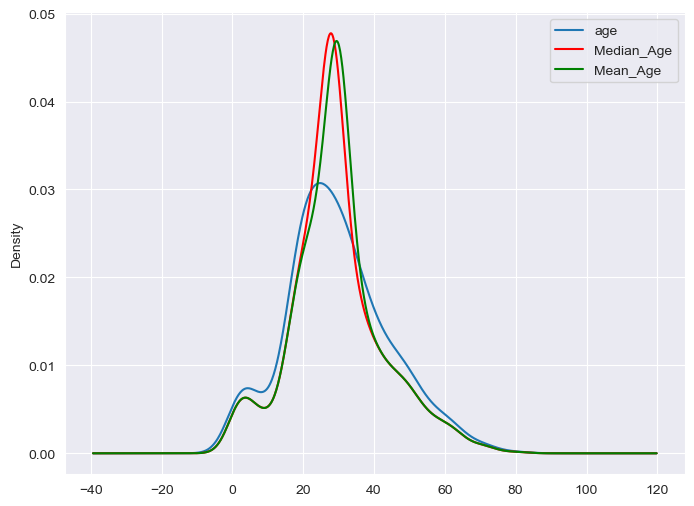

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'] .plot(kind='kde', ax=ax)

titanic_data['Median_Age'] .plot(kind='kde', ax=ax, color='red')

titanic_data['Mean_Age'] .plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### 3.3.2. End of Distribution Imputation

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')



titanic_data  = titanic_data[["survived", "pclass", "age", "fare"]]


titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

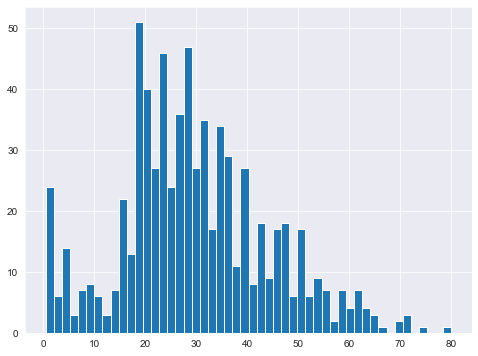

In [23]:
titanic_data.age.hist(bins=50)

In [25]:
eod_value = titanic_data.age.mean() + 3 * titanic_data.age.std()
print(eod_value)

73.27860964406095


In [27]:
import numpy as np

titanic_data['age_eod'] = titanic_data.age.fillna(eod_value)
titanic_data.head(20)

,survived,pclass,age,fare,age_eod
0,0,3,22.0,7.2500,22.00000
1,1,1,38.0,71.2833,38.00000
2,1,3,26.0,7.9250,26.00000
3,1,1,35.0,53.1000,35.00000
4,0,3,35.0,8.0500,35.00000
5,0,3,NaN,8.4583,73.27861
6,0,1,54.0,51.8625,54.00000
7,0,3,2.0,21.0750,2.00000
8,1,3,27.0,11.1333,27.00000
9,1,2,14.0,30.0708,14.00000


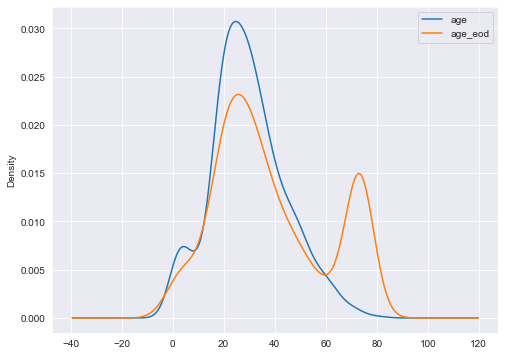

In [28]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'] .plot(kind='kde', ax=ax)
titanic_data['age_eod'] .plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### 3.3.3. Aribitrary Value  Imputation

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')



titanic_data  = titanic_data[["survived", "pclass", "age", "fare"]]


titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

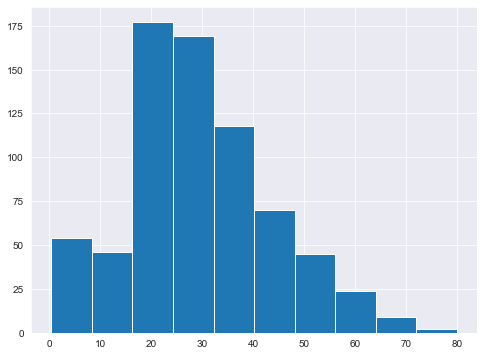

In [18]:
titanic_data.age.hist()

In [19]:
import numpy as np

titanic_data['age_99'] = titanic_data.age.fillna(99)

titanic_data['age_minus1'] = titanic_data.age.fillna(-1)


titanic_data.head(20)

,survived,pclass,age,fare,age_99,age_minus1
0,0,3,22.0,7.2500,22.0,22.0
1,1,1,38.0,71.2833,38.0,38.0
2,1,3,26.0,7.9250,26.0,26.0
3,1,1,35.0,53.1000,35.0,35.0
4,0,3,35.0,8.0500,35.0,35.0
5,0,3,NaN,8.4583,99.0,-1.0
6,0,1,54.0,51.8625,54.0,54.0
7,0,3,2.0,21.0750,2.0,2.0
8,1,3,27.0,11.1333,27.0,27.0
9,1,2,14.0,30.0708,14.0,14.0


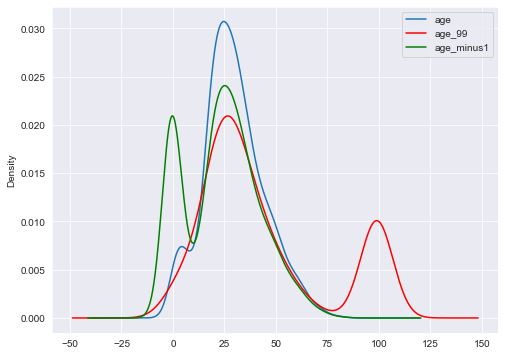

In [20]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'] .plot(kind='kde', ax=ax)

titanic_data['age_99'] .plot(kind='kde', ax=ax, color='red')

titanic_data['age_minus1'] .plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 3.4. Handling Categorical Data

#### 3.4.1. Frequent Category Imputation

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["embark_town", "age", "fare"]]
titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

Text(0, 0.5, 'Number of Passengers')

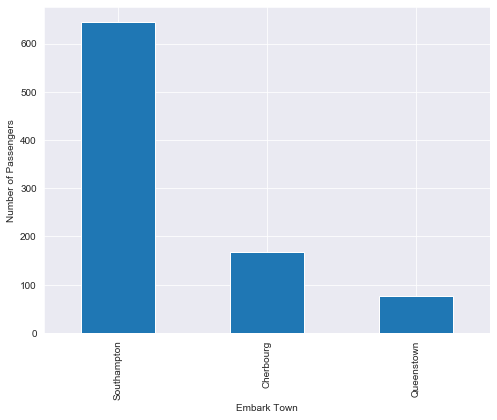

In [32]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')

In [33]:
titanic_data.embark_town.mode()

0    Southampton
dtype: object

In [34]:
titanic_data.embark_town.fillna('Southampton', inplace=True)

In [35]:
titanic_data.age.mode()

0    24.0
dtype: float64

In [36]:
import numpy as np


titanic_data['age_mode'] = titanic_data.age.fillna(24)


titanic_data.head(20)

,embark_town,age,fare,age_mode
0,Southampton,22.0,7.2500,22.0
1,Cherbourg,38.0,71.2833,38.0
2,Southampton,26.0,7.9250,26.0
3,Southampton,35.0,53.1000,35.0
4,Southampton,35.0,8.0500,35.0
5,Queenstown,NaN,8.4583,24.0
6,Southampton,54.0,51.8625,54.0
7,Southampton,2.0,21.0750,2.0
8,Southampton,27.0,11.1333,27.0
9,Cherbourg,14.0,30.0708,14.0


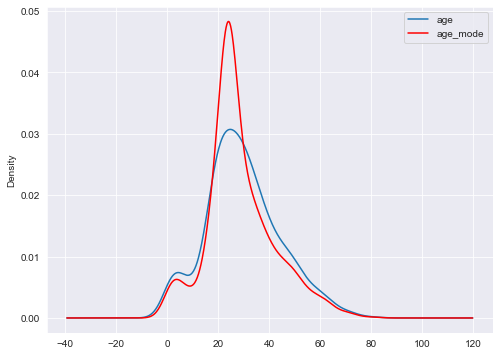

In [37]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'] .plot(kind='kde', ax=ax)

titanic_data['age_mode'] .plot(kind='kde', ax=ax, color='red')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### 3.4.2. Missing Category Imputation

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["embark_town", "age", "fare"]]
titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [39]:
titanic_data.embark_town.fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of Passengers')

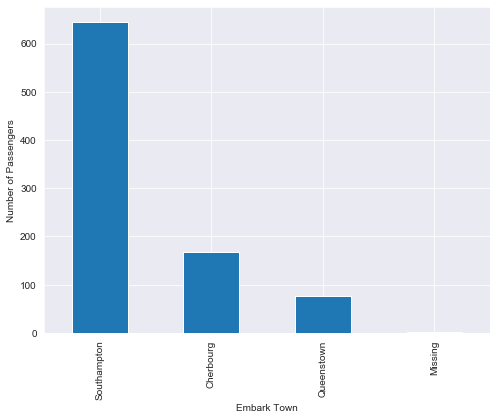

In [40]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')

### Exercise 3.1

#### Question 1

What is the major disadvantage of mean and median imputation?

A. Distorts the data distribution \
B. Distorts the data variance \
C. Distorts the data covariance \
D. All of the Above

Answer: D

#### Question 1

Which imputation should be used when the data is not missing at random.

A. Mean and Median Imputation \
B. Aribitrary Value Imputation \
C. End of Distribution Imputation \
D. Missing Value Imputation

Answer: A

#### Question 3

How should the end of tail distribution should be calculated for normal distribution?

A. IQR Rule \
B. Mean x 3 Standard deviations\
C. Mean \
D. Median

Answer: B

### Exercise 3.2

Replace the missing values in the "deck" column of the Titanic dataset by the most 
frequently occuring categories in that column. Plot a bar plot for the updated "deck" column. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["deck"]]
titanic_data.head()
titanic_data.isnull().mean()

titanic_data.deck.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('deck')
plt.ylabel('Number of Passengers')

titanic_data.deck.mode()

titanic_data.deck.fillna('C', inplace=True)

titanic_data.deck.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('deck')
plt.ylabel('Number of Passengers')